In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
dfs = []
max_plddt = []
for file in os.listdir('./results/'):
    if 'csv' in file:
        protein_results = pd.read_csv(os.path.join('./results/', file))
        dfs.append(protein_results)
        
        max_plddt.append(protein_results.loc[protein_results['type'] == 'wm'].groupby('T')['pLDDT'].max())
        
df = pd.concat(dfs)

In [4]:
max_plddt = pd.concat(max_plddt,axis=1).T
max_plddt.index = [name[:-4]  for name in os.listdir('./results/') if 'csv' in name]

In [5]:
df.to_csv('./wm&temp&performance.csv')

In [14]:
df['type'] = df['type'].apply(lambda x: "watermarked" if x == 'wm' else "original")

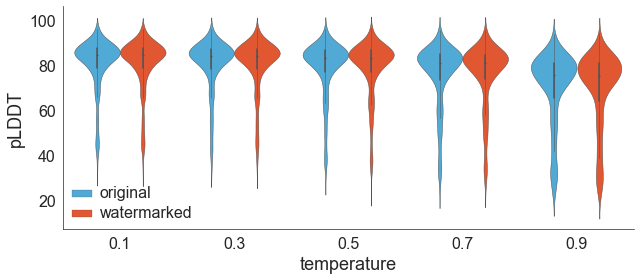

In [100]:
sns.set_style("white")
colormap = {'original':'#51A9D6',
            'watermarked':'#E05732'}
fig, ax = plt.subplots(1, 1, figsize=(9, 4),  sharey=True)
sns.violinplot(data=df, x='T', y='pLDDT', hue='type',
               palette=colormap, saturation=1, linewidth=0.5,
               ax=ax)
# Customizing the legend
ax.legend(title='')
legend = ax.legend(frameon=False)  # Remove legend border
plt.setp(legend.get_texts(), fontsize=16)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.7)
ax.spines['bottom'].set_linewidth(0.7)
ax.set_xlabel('temperature', fontsize=18)
ax.set_ylabel('pLDDT', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=16) 

plt.tight_layout()
plt.savefig("mpnn_watermark_performance.pdf", format='pdf')
plt.show()

In [38]:
max_plddt = max_plddt.drop(['7WC9', '8A7Z'])

In [48]:
max_plddt.columns.name = 'temperature'

In [76]:
ordered_name = ['7W8E','7VE4','8S9E','8A7Z','8OXI','7QYW','7R20','8FAF','7FY9','7ZOS','7FPN','7TX5','7ZK2','8FKM','7QS3','8F03','7QZS',
                '7Z0A','8AHB','8FMC','8CMV','8C1I','8ETQ','7ZEE','7XQ7','7YBX','5SG4','8FEN','7QMS','8ASZ','7WC9','8ABX','7T32','7S15',
                '8GM1','7Z2T','7UI4','8DWI','7G9V','7W09','7QGI','7RL2','7SPT','8AGG','8B0K','8E3S','8TV8','7XOR','8HDF','8CNS','7TVB',
                '8OTB','8WIM','7TA5','8HRN','7UNP','7VEV','8F3G','8F3X','8F3F']

In [82]:
ordered_name.remove('7WC9')
ordered_name.remove('8A7Z')

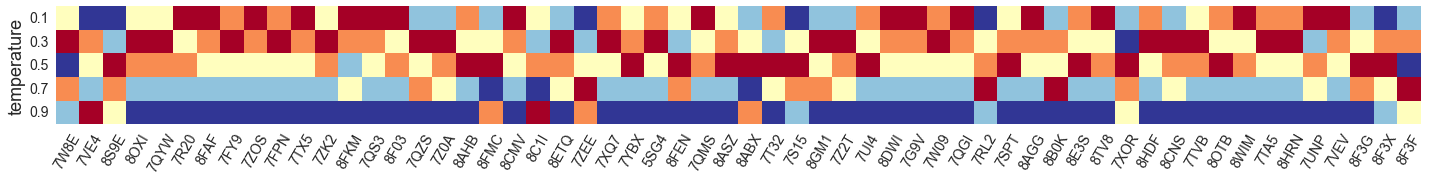

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap

# Assuming max_plddt is your DataFrame with rank values
# max_plddt = pd.DataFrame(...)  # Initialize your DataFrame here

# Access the "RdYlBu_r" colormap
original_cmap = plt.cm.RdYlBu_r

# Normalize your ranks to the range of the colormap (0 to 1) and select colors
# Assuming 5 discrete values, we map them evenly across the color range of the original colormap
colors = original_cmap(np.linspace(0, 1, 5))

# Create a new ListedColormap with the selected colors
custom_cmap = ListedColormap(colors)

# Plotting the heatmap with the custom discrete colormap
fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharey=True)
df_1 = max_plddt.rank(axis=1, method='max').T
df_1 = df_1.loc[:,ordered_name]
heatmap = sns.heatmap(df_1, square=True, cmap=custom_cmap, ax=ax,
                      cbar_kws={'orientation': 'horizontal'}, cbar=False)
ax.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=14)
ax.set_xticklabels(heatmap.get_xticklabels(), rotation=60, fontsize=14)
ax.set_ylabel('temperature', fontsize=18)
plt.tight_layout()
plt.savefig("mpnn_watermark_best.pdf", format='pdf')
plt.show()

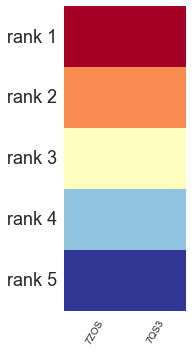

In [102]:
df_2 = max_plddt.rank(axis=1, method='max').T.loc[:,['7ZOS','7QS3']]
df_2.index=['rank 1','rank 2','rank 3','rank 4','rank 5']
fig, ax = plt.subplots(1, 1, figsize=(20, 5), sharey=True)
heatmap = sns.heatmap(df_2, square=True, cmap=custom_cmap, ax=ax,
                      cbar_kws={'orientation': 'horizontal'}, cbar=False)
ax.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=18)
ax.set_xticklabels(heatmap.get_xticklabels(), rotation=60)
plt.tight_layout()
plt.savefig("mpnn_watermark_best_cbar.pdf", format='pdf')
plt.show()

In [26]:
cols_to_check

Index(['index', 'T'], dtype='object')

,7ZOS,7QS3
temperature,,
0.1,5.0,5.0
0.3,4.0,4.0
0.5,3.0,3.0
0.7,2.0,2.0
0.9,1.0,1.0
